In [1]:
import tensorflow as tf
import nltk
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
from sklearn.model_selection import train_test_split 
from tensorflow.keras.preprocessing.text import Tokenizer 

def show_history(h):
    epochs_trained = len(h.history['loss'])
    plt.figure(figsize=(16, 6))

    plt.subplot(1, 2, 1)
    plt.plot(range(0, epochs_trained), h.history.get('accuracy'), label='Training')
    plt.plot(range(0, epochs_trained), h.history.get('val_accuracy'), label='Validation')
    plt.ylim([0., 1.])
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(range(0, epochs_trained), h.history.get('loss'), label='Training')
    plt.plot(range(0, epochs_trained), h.history.get('val_loss'), label='Validation')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    
def show_confusion_matrix(y_true, y_pred, classes):
    from sklearn.metrics import confusion_matrix
    
    cm = confusion_matrix(y_true, y_pred, normalize='true')

    plt.figure(figsize=(8, 8))
    sp = plt.subplot(1, 1, 1)
    ctx = sp.matshow(cm)
    plt.xticks(list(range(0, 6)), labels=classes)
    plt.yticks(list(range(0, 6)), labels=classes)
    plt.colorbar(ctx)
    plt.show()
   
print('Using TensorFlow version', tf.__version__)

Using TensorFlow version 2.7.0


In [2]:
!pip install datasets

In [58]:
pd.set_option('display.max_colwidth', None)

In [3]:
from datasets import load_dataset

emotion_dataset = load_dataset("emotion")

Using custom data configuration default
Reusing dataset emotion (C:\Users\valsa\.cache\huggingface\datasets\emotion\default\0.0.0\348f63ca8e27b3713b6c04d723efe6d824a56fb3d1449794716c0f0296072705)


  0%|          | 0/3 [00:00<?, ?it/s]

In [4]:
emotion_dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [5]:
emotion_train = emotion_dataset['train']
print(emotion_train[0])
print(emotion_train.column_names)
print(emotion_train.features)

{'text': 'i didnt feel humiliated', 'label': 0}
['text', 'label']
{'text': Value(dtype='string', id=None), 'label': ClassLabel(num_classes=6, names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'], names_file=None, id=None)}


In [6]:
emotion_dataset.set_format(type="pandas")
df1 = emotion_dataset["train"][:]
test = emotion_dataset["test"][:]
val = emotion_dataset["validation"][:]

In [7]:
df1 = df1.rename(columns={'text':'sentence','label':'emotion'})

In [59]:
df1.head()

,emotion,sentence
0,sadness,i didnt feel humiliated
1,sadness,i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake
2,anger,im grabbing a minute to post i feel greedy wrong
3,love,i am ever feeling nostalgic about the fireplace i will know that it is still on the property
4,anger,i am feeling grouchy


In [60]:
df1 = df1[["emotion", "sentence"]]

In [61]:
df1.head()

,emotion,sentence
0,sadness,i didnt feel humiliated
1,sadness,i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake
2,anger,im grabbing a minute to post i feel greedy wrong
3,love,i am ever feeling nostalgic about the fireplace i will know that it is still on the property
4,anger,i am feeling grouchy


In [62]:
df1.emotion.unique()

array(['sadness', 'anger', 'love', 'surprise', 'fear', 'joy'],
      dtype=object)

In [64]:
df1 = df1.replace([0,1,2,3,4,5],['sadness','joy','love','anger','fear','surprise'])
df1.head()

,emotion,sentence
0,sadness,i didnt feel humiliated
1,sadness,i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake
2,anger,im grabbing a minute to post i feel greedy wrong
3,love,i am ever feeling nostalgic about the fireplace i will know that it is still on the property
4,anger,i am feeling grouchy


In [65]:
df2 = pd.read_csv('G:\My Drive\AnjanaValsalan_ECNG 3020\Implementation Files\ISEAR csv\ISEAR.csv')

In [66]:
df2.head()

,emotion,sentence,Unnamed: 2
0,joy,On days when I feel close to my partner and other friends. \nWhen I feel at peace with myself and also experience a close \ncontact with people whom I regard greatly.,NaN
1,fear,"Every time I imagine that someone I love or I could contact a \nserious illness, even death.",NaN
2,anger,When I had been obviously unjustly treated and had no possibility \nof elucidating this.,NaN
3,sadness,When I think about the short time that we live and relate it to \nthe periods of my life when I think that I did not use this \nshort time.,NaN
4,disgust,At a gathering I found myself involuntarily sitting next to two \npeople who expressed opinions that I considered very low and \ndiscriminating.,NaN


In [67]:
df2.dropna(axis=1, how="any", thresh=None, subset=None, inplace=True)

In [68]:
df2.head()

,emotion,sentence
0,joy,On days when I feel close to my partner and other friends. \nWhen I feel at peace with myself and also experience a close \ncontact with people whom I regard greatly.
1,fear,"Every time I imagine that someone I love or I could contact a \nserious illness, even death."
2,anger,When I had been obviously unjustly treated and had no possibility \nof elucidating this.
3,sadness,When I think about the short time that we live and relate it to \nthe periods of my life when I think that I did not use this \nshort time.
4,disgust,At a gathering I found myself involuntarily sitting next to two \npeople who expressed opinions that I considered very low and \ndiscriminating.


In [69]:
frames = [df1, df2]

In [70]:
df = pd.concat(frames)

In [71]:
df.reset_index(drop=True)

,emotion,sentence
0,sadness,i didnt feel humiliated
1,sadness,i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake
2,anger,im grabbing a minute to post i feel greedy wrong
3,love,i am ever feeling nostalgic about the fireplace i will know that it is still on the property
4,anger,i am feeling grouchy
...,...,...
23511,shame,Two years back someone invited me to be the tutor of her \ngrand-daughter. The grand-daughter asked me some questions in \nmathematics so I taught her. However she did not listen to me \nand this made me feel unhappy. The second year it was the same. \nWhen I entered university the girl's parents suggested that I be \nemployed as their daghters tutor. They told me that at university \nthere was no homework and I would have a lot of time so they \nmade a time-table for me which required me to be the tutor five \ndays a week. They did not respect me and anyway I had another \nchild to teach.
23512,shame,I had taken the responsibility to do something and I had \nprepared for it. However I failed because of my timidity. After \nthree attempts I still could not adapt to the atmosphere and \nfailed as before. I felt imcompetent and felt that the others \nwould think that I had not prepared for it.
23513,fear,I was at home and I heard a loud sound of spitting outside the \ndoor. I thought that one of my family members would step on the spit \nand bring the germs in the house.
23514,guilt,I did not do the homework that the teacher had asked us to do. I \nwas scolded immediately.


In [77]:
text = df.drop(columns = ['emotion']).copy()
label = df['emotion']

text_list = text.values.tolist()

In [76]:
label_list = label.values.tolist()

In [21]:
train_size=0.8

text = df.drop(columns = ['emotion']).copy()
label = df['emotion']

text_train, text_rem, label_train, label_rem = train_test_split(text,label, train_size=0.8)

test_size = 0.5
text_valid, text_test, label_valid, label_test = train_test_split(text_rem,label_rem,test_size=0.5)

print(text_train.shape), print(label_train.shape)
print(text_valid.shape), print(label_valid.shape)
print(text_test.shape), print(label_test.shape)

(18812, 1)
(18812,)
(2352, 1)
(2352,)
(2352, 1)
(2352,)


(None, None)

In [22]:
text_train.values.tolist()[0]

['i feel it s so obnoxious another vocab word']

In [23]:
label_train.values.tolist()[0]

'anger'

In [24]:
text_test

,sentence
10928,i think it makes me feel like the heir to an i...
6408,It was on 9th January 1983 when I received a m...
5657,I vividly remember having feelings of disgust ...
13735,i don t have that much money and as i say that...
4075,I was with a girl one night and then did not c...
...,...
3100,A friend visited and made comments that my hou...
2644,When I quarrelled with my boyfriend.
3421,i feel if it aint broke why fix it
11788,i really feel deprived


In [25]:
text_train_list=[ i[0] for i in text_train.values.tolist()]

In [26]:
text_train_list[0]

'i feel it s so obnoxious another vocab word'

In [27]:
label_train_list=[ i[0] for i in label_train.values.tolist()]

In [28]:
label_train_list[0]

'a'

In [29]:
label_train.values.tolist()

['anger',
 'joy',
 'anger',
 'sadness',
 'sadness',
 'sadness',
 'joy',
 'sadness',
 'shame',
 'joy',
 'surprise',
 'sadness',
 'anger',
 'guilt',
 'anger',
 'fear',
 'disgust',
 'anger',
 'guilt',
 'shame',
 'fear',
 'joy',
 'joy',
 'joy',
 'anger',
 'disgust',
 'sadness',
 'disgust',
 'joy',
 'shame',
 'joy',
 'joy',
 'joy',
 'fear',
 'disgust',
 'anger',
 'sadness',
 'joy',
 'guilt',
 'joy',
 'joy',
 'fear',
 'joy',
 'sadness',
 'shame',
 'joy',
 'shame',
 'fear',
 'sadness',
 'anger',
 'disgust',
 'joy',
 'sadness',
 'joy',
 'sadness',
 'joy',
 'joy',
 'shame',
 'love',
 'joy',
 'fear',
 'sadness',
 'joy',
 'joy',
 'sadness',
 'sadness',
 'sadness',
 'joy',
 'joy',
 'joy',
 'joy',
 'joy',
 'fear',
 'anger',
 'joy',
 'anger',
 'fear',
 'anger',
 'fear',
 'joy',
 'guilt',
 'sadness',
 'love',
 'joy',
 'guilt',
 'sadness',
 'disgust',
 'anger',
 'fear',
 'sadness',
 'joy',
 'sadness',
 'anger',
 'sadness',
 'anger',
 'joy',
 'fear',
 'sadness',
 'sadness',
 'fear',
 'joy',
 'sadness',

In [30]:
tokenizer = Tokenizer(num_words=1000000, oov_token='<UNK>')
tokenizer.fit_on_texts([text_train_list[1]])

In [31]:
tokenizer.texts_to_sequences([text_train_list[1]])

[[2,
  5,
  3,
  6,
  7,
  8,
  4,
  2,
  3,
  9,
  10,
  4,
  2,
  3,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19]]

In [32]:
text_train_list[1]

'im just trusting in my feelings and im trusting god above and im trusting you can give this baby both his mothers love'

<function matplotlib.pyplot.show(close=None, block=None)>

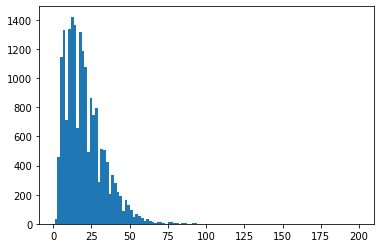

In [33]:
lengths = [len(t.split(' ')) for t in text_train_list]
plt.hist(lengths, bins = len(set(lengths)))
plt.show

In [34]:
max_length = 200
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [35]:
def get_sequences(tokenizer, text_train_list):
    sequences = tokenizer.texts_to_sequences(text_train_list)
    padded = pad_sequences(sequences, truncating='post', padding='post', maxlen = max_length)
    return padded

In [36]:
padded_train_seq = get_sequences(tokenizer,text_train_list)

In [37]:
padded_train_seq

array([[1, 1, 1, ..., 0, 0, 0],
       [2, 5, 3, ..., 0, 0, 0],
       [2, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]])

In [38]:
classes = set(label_train)
print(classes)

{'anger', 'shame', 'disgust', 'sadness', 'guilt', 'joy', 'fear', 'surprise', 'love'}


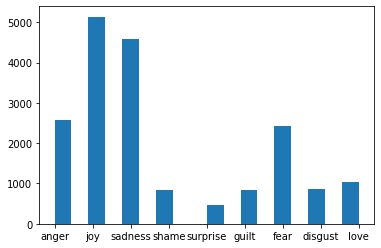

In [39]:
plt.hist(label_train, bins=18)
plt.show()

In [40]:
class_to_index = dict((c,i) for i, c in enumerate(classes))
index_to_class = dict((v, k) for k, v in class_to_index.items())

In [41]:
class_to_index

{'anger': 0,
 'shame': 1,
 'disgust': 2,
 'sadness': 3,
 'guilt': 4,
 'joy': 5,
 'fear': 6,
 'surprise': 7,
 'love': 8}

In [42]:
index_to_class

{0: 'anger',
 1: 'shame',
 2: 'disgust',
 3: 'sadness',
 4: 'guilt',
 5: 'joy',
 6: 'fear',
 7: 'surprise',
 8: 'love'}

In [43]:
names_to_ids = lambda label_train: np.array([class_to_index.get(x) for x in label_train])

In [44]:
train_labels = names_to_ids(label_train)
print(train_labels[0])

0


In [45]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(23516, 16, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20)),
    tf.keras.layers.Dense(9, activation='softmax')
])

optimizer = tf.keras.optimizers.Adam(
    learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False,
    name='Adam'
)

model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer = optimizer,
    metrics=['accuracy']
)

In [46]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 16)           376256    
                                                                 
 bidirectional (Bidirectiona  (None, 200, 40)          5920      
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 40)               9760      
 nal)                                                            
                                                                 
 dense (Dense)               (None, 9)                 369       
                                                                 
Total params: 392,305
Trainable params: 392,305
Non-trainable params: 0
_________________________________________________________________


In [50]:
text_valid_list=[ i[0] for i in text_valid.values.tolist()]

In [51]:
text_val_seq = get_sequences(tokenizer, text_valid_list)

In [52]:
text_val_seq

array([[ 1,  1,  1, ...,  0,  0,  0],
       [ 1,  1,  1, ...,  0,  0,  0],
       [ 1,  1,  1, ...,  0,  0,  0],
       ...,
       [ 1,  1,  1, ...,  0,  0,  0],
       [ 1, 19,  1, ...,  0,  0,  0],
       [ 1,  1, 10, ...,  0,  0,  0]])

In [53]:
train_labels

array([0, 5, 0, ..., 5, 0, 0])

In [54]:
label_valid = names_to_ids(label_valid)

In [55]:
label_valid

array([0, 3, 8, ..., 5, 5, 5])

In [57]:
h = model.fit(
padded_train_seq, train_labels,
validation_data=(text_val_seq, label_valid),
batch_size = 200,
epochs=25,
callbacks=[
    tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience = 5)
])

Epoch 1/25
95/95 [==============================] - 23s 244ms/step - loss: 1.8994 - accuracy: 0.2767 - val_loss: 1.8761 - val_accuracy: 0.2925
Epoch 2/25
95/95 [==============================] - 22s 235ms/step - loss: 1.8931 - accuracy: 0.2792 - val_loss: 1.8773 - val_accuracy: 0.2666
Epoch 3/25
95/95 [==============================] - 23s 242ms/step - loss: 1.8843 - accuracy: 0.2802 - val_loss: 1.8635 - val_accuracy: 0.2768
Epoch 4/25
95/95 [==============================] - 25s 263ms/step - loss: 1.8770 - accuracy: 0.2801 - val_loss: 1.8507 - val_accuracy: 0.2823
Epoch 5/25
95/95 [==============================] - 24s 255ms/step - loss: 1.8698 - accuracy: 0.2822 - val_loss: 1.8538 - val_accuracy: 0.2866
Epoch 6/25
95/95 [==============================] - 24s 248ms/step - loss: 1.8665 - accuracy: 0.2826 - val_loss: 1.8454 - val_accuracy: 0.2836


In [ ]:
show_history(h)